# Exploratory Data Analysis (EDA) on Titanic Dataset

This notebook performs data cleaning, statistical analysis, and visualization
to understand survival patterns in the Titanic dataset.


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside notebook
%matplotlib inline

# Set style for better visuals
sns.set_style("whitegrid")

print("Libraries imported successfully!")


Libraries imported successfully!


In [5]:
# Load Titanic dataset from seaborn
df = sns.load_dataset("titanic")

# Show first 5 rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Shape of dataset
print("Shape of dataset:", df.shape)

# Column names
print("\nColumns:")
print(df.columns)

# Info about data types and missing values
print("\nDataset Info:")
df.info()


Shape of dataset: (891, 15)

Columns:
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  ali

In [7]:
# Summary statistics of numerical columns
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Check missing values
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
# Fill missing age values with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing embark_town with mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Drop 'deck' column (too many missing values)
df.drop(columns=['deck'], inplace=True)

print("Missing values handled!")


C:\Users\asus\AppData\Local\Temp\ipykernel_1368\1214090093.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_1368\1214090093.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

KeyError: "['deck'] not found in axis"

In [13]:
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# VISUALIZATION

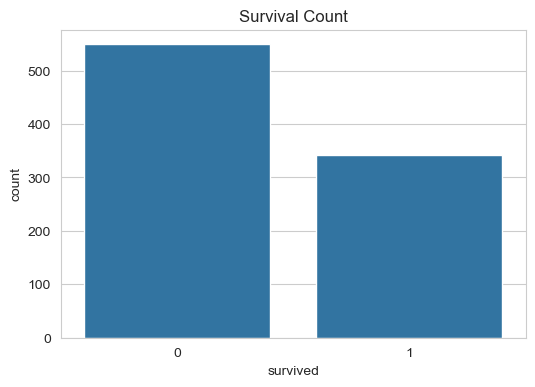

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()


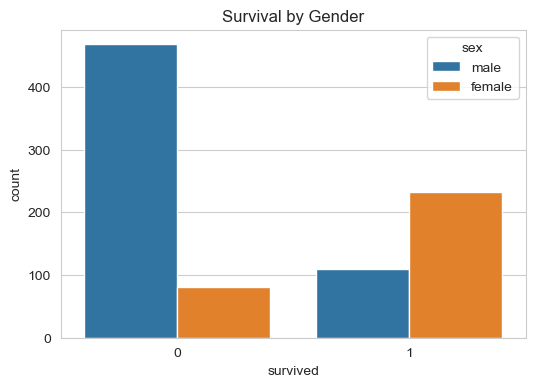

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='survived', hue='sex', data=df)
plt.title("Survival by Gender")
plt.show()


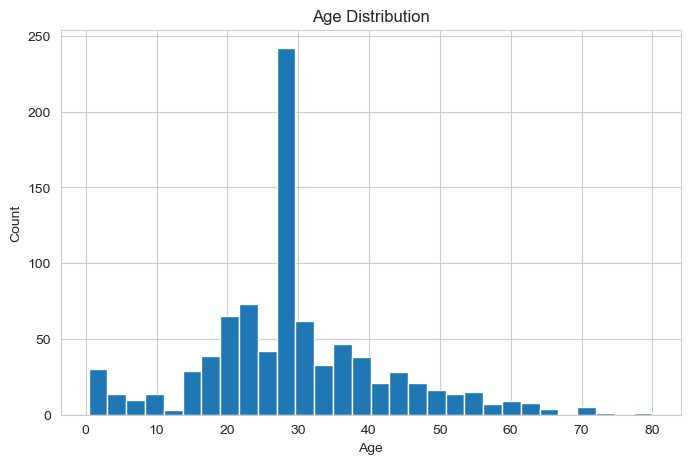

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


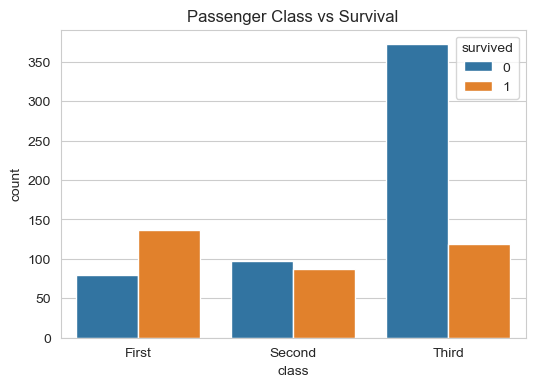

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', hue='survived', data=df)
plt.title("Passenger Class vs Survival")
plt.show()


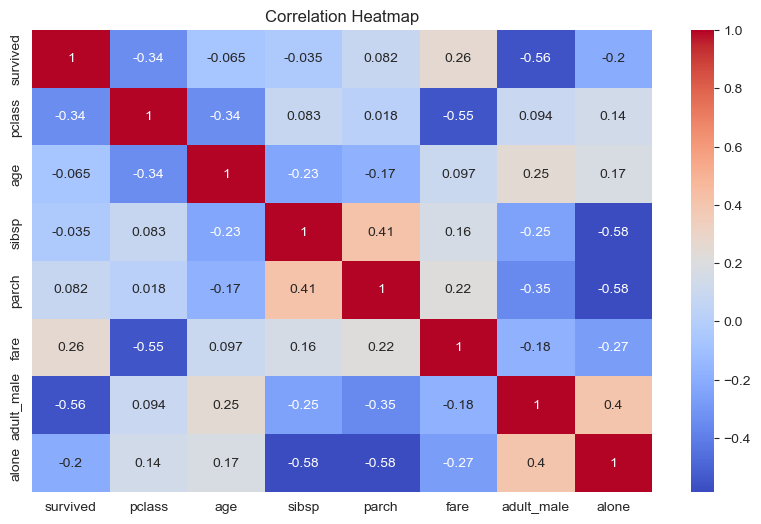

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


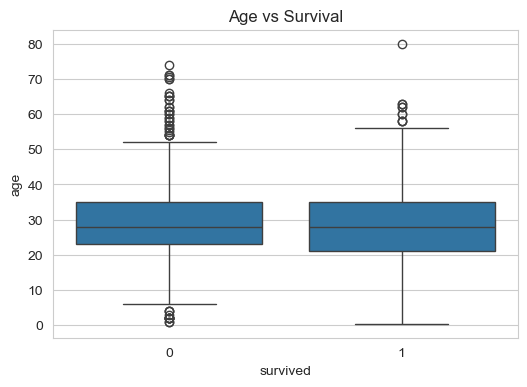

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='survived', y='age', data=df)
plt.title("Age vs Survival")
plt.show()


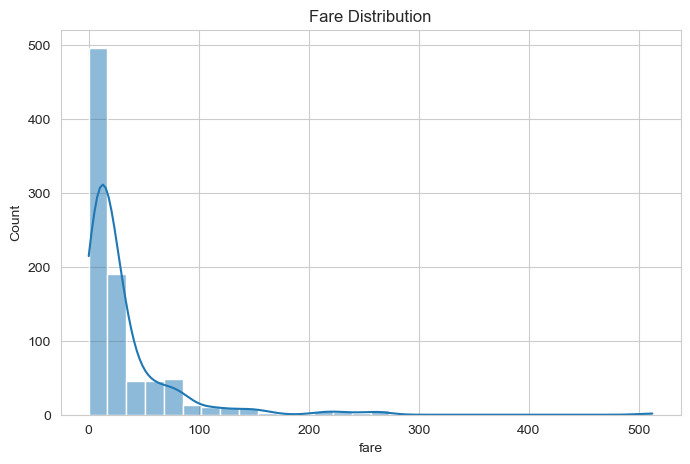

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()


# Key Insights

1. Females had significantly higher survival rate.
2. First class passengers survived more than third class.
3. Younger passengers had slightly better survival chances.
4. Fare is positively related to survival.
5. There were outliers in fare distribution.
6. Passenger class strongly influenced survival probability.
